In [20]:
import numpy as np
import pandas as pd 
import os
from pandas import read_csv
from google.colab import files
import io


#Lets load the dataset and sample some
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['Boston.csv'].decode('utf-8')))
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
display(df)

#this site explains all the column labels: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Saving Boston.csv to Boston (3).csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


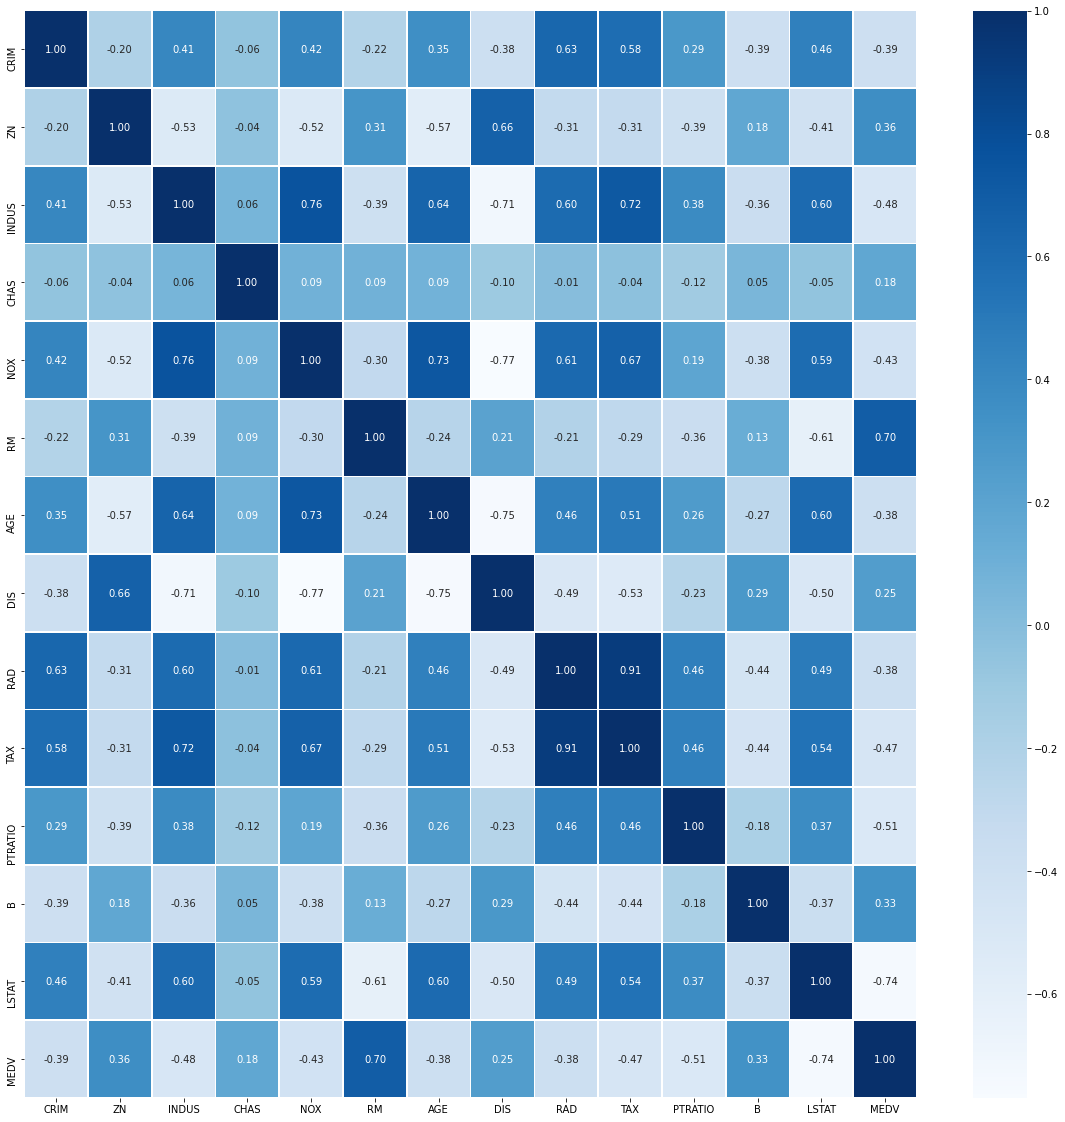

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA

pca = PCA(df, standardize=True, method='eig')
components_df = pca.factors # array with all the principal components (eigenvectors of covariance matrix)
normalized_dataset = pca.transformed_data

covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), columns=df.columns)
plt.subplots(figsize=(20,20))

sns.heatmap(covariance_df, cmap="Blues", linewidths=.7, annot=True, fmt='.2f',yticklabels=df.columns)
plt.show()

<function matplotlib.pyplot.show>

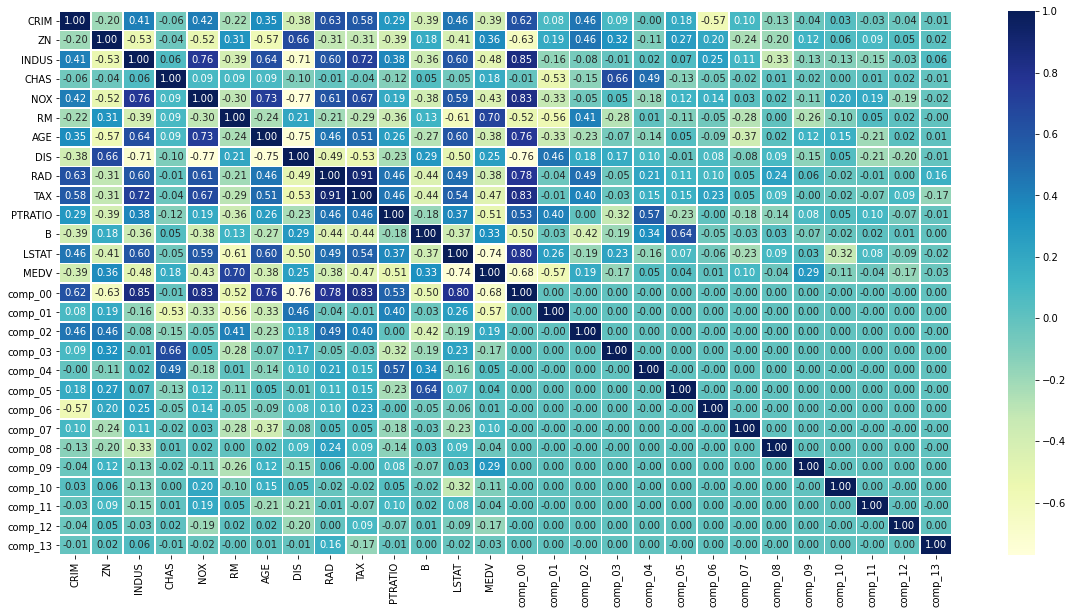

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(df, standardize=True, method='eig')
components_df = pca.factors # array with all the principal components (eigenvectors of covariance matrix)

combined_df = pd.concat([df, components_df], axis=1)
correlation = combined_df.corr()

correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlation, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show